# Module 4 - Data Visualization

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

Diamonds
Analyze diamonds by their cut, color, clarity, price, and other attributes

Index counter
carat - Carat weight of the diamond
cut - Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
color - Color of the diamond, with D being the best and J the worst
clarity - How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
depth - depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
table - table%: The width of the diamond's table expressed as a percentage of its average diameter
price - the price of the diamond
x - length mm
y - width mm
z - depth mm

FROM internet information:
https://beyond4cs.com/grading/depth-and-table-values/

In [4]:
#df = pd.read_csv("datasets/Pokemon.csv", encoding = "ISO-8859-1") #1st column needs encoding to read pound/hashtag(#) symbol
#df.head()


dsloc = 'diamonds.csv'
df = pd.read_csv(dsloc)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
#rename the pound/hashtag(#) column so it doesn't cause further issues
df.rename(columns={'Unnamed: 0': 'Number'}, inplace =True)

In [8]:
#validate
df.head()

,Number,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
#set indices as Pokemon numbers
df.set_index('Number', inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


CLEAN THE DATA

In [33]:
dupe = df.duplicated() #creates list of True/False values
df[dupe] #shows rows where duplicated is True

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1009,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2026,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
2184,1.00,Fair,E,SI2,67.0,53.0,3136,6.19,6.13,4.13
2821,1.00,Fair,F,SI2,65.1,55.0,3265,6.26,6.23,4.07
3157,0.90,Very Good,I,VS2,58.4,62.0,3334,6.29,6.35,3.69
3705,1.00,Ideal,E,SI2,62.9,56.0,3450,6.32,6.30,3.97


In [34]:
#drops duplicate rows, default is to keep first observation
df.drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49


In [36]:

#drop rows with any missing data
df_no_missing = df.dropna()
df_no_missing

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49


FIND THE MAX VAL AND DISPLAY THE ROW

In [51]:
xx = df['price'].max()
maxrowprice = df[df['price']==xx]
maxrowprice.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
27750,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


In [52]:
xy = df['price'].min()
minrowprice = df[df['price']==xy]
minrowprice.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [53]:
xcarat = df['carat'].max()
maxrowcarat = df[df['carat']==xcarat]
maxrowcarat.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


In [55]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [63]:
df.groupby('clarity')
#add a stats or math function to it
df['price'].groupby(df['clarity']).mean()


#mean of multiple columns
#df[['hours', 'exercise']].groupby(df['gender']).mean()

clarity
I1      3924.168691
IF      2864.839106
SI1     3996.001148
SI2     5063.028606
VS1     3839.455391
VS2     3924.989395
VVS1    2523.114637
VVS2    3283.737071
Name: price, dtype: float64

In [ ]:
df['carat','price'].groupby(df['clarity']).mean()

In [68]:
pd.pivot_table(df, index="clarity", values="price")

,price
clarity,
I1,3924.168691
IF,2864.839106
SI1,3996.001148
SI2,5063.028606
VS1,3839.455391
VS2,3924.989395
VVS1,2523.114637
VVS2,3283.737071


In [69]:
pd.pivot_table(df, index="clarity", values=["carat"])

,carat
clarity,
I1,1.283846
IF,0.505123
SI1,0.850482
SI2,1.077648
VS1,0.727158
VS2,0.763935
VVS1,0.503321
VVS2,0.596202


PLOT THE DATA 

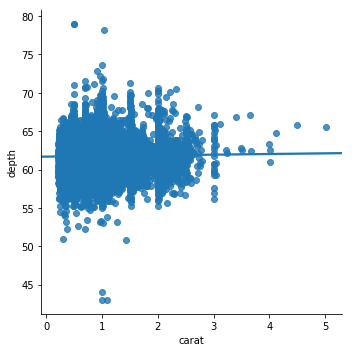

In [12]:
#make a scatterplot
sns.lmplot(x='carat', y='depth', data=df)

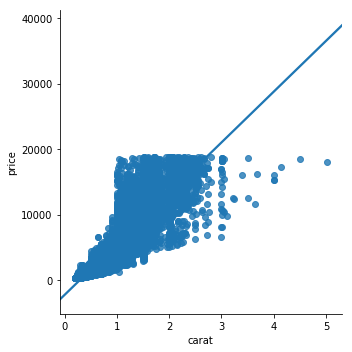

In [70]:
#Carat vs. price scatterplot
sns.lmplot(x='carat', y='price', data=df)

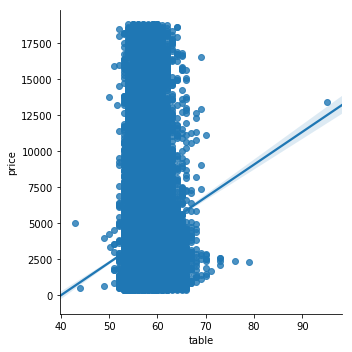

In [72]:
#clarity vs. price
sns.lmplot(x='table', y='price', data=df)

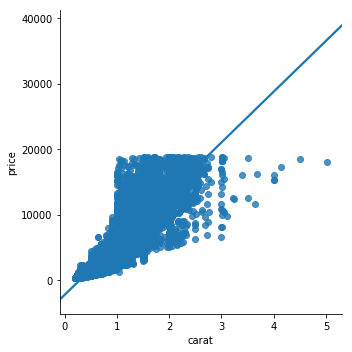

In [13]:
#Carat Vs. price 
sns.lmplot(x='carat', y='price', data=df)

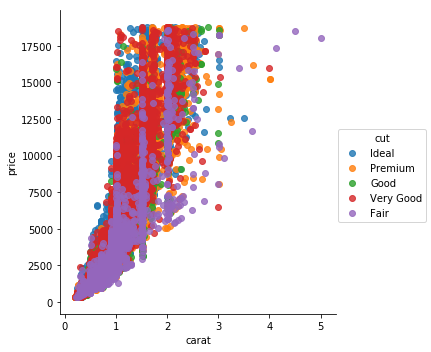

In [16]:
#add more details to scatterplot
sns.lmplot(x='carat', y='price', data=df, 
           fit_reg=False, #remove regression line
           hue='cut')   #color by evolution stage

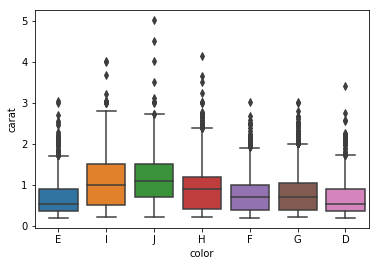

In [77]:
#boxplot showing stats for each characteristic
box_df = df.drop(['x','y','z'],axis=1)
sns.boxplot(x='color', y='carat', data=box_df)

In [21]:
#create a dataframe containing the stats  
#drop Total, Stage, and Legendary
stats_df = df.drop(['depth', 'table'], axis=1)
stats_df.head()

,carat,cut,color,clarity,price,x,y,z
Number,,,,,,,,
1,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,335,4.34,4.35,2.75


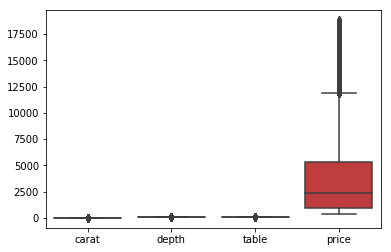

In [18]:
#boxplot for stats
sns.boxplot(data=stats_df)

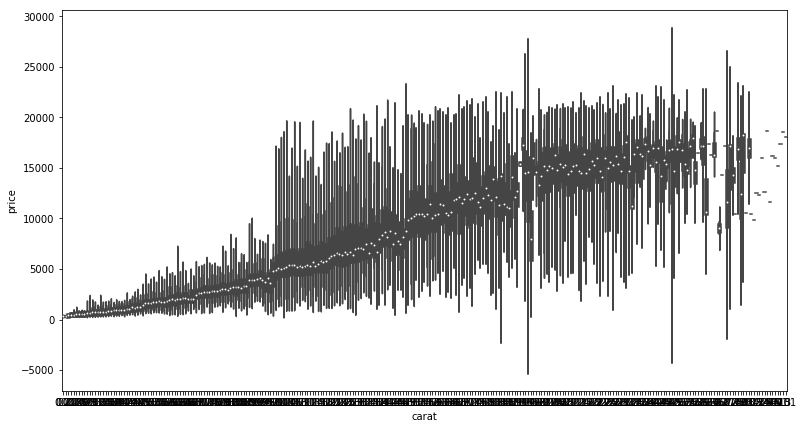

In [20]:
#change size of plot
plt.subplots(figsize=(13,7))

#violin plot shows the distribution of attack power for each type
sns.violinplot(x='carat', y='price', data=df)

In [23]:
#create color palette
#color Hex numbers are from Bulbapedia (https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates)
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

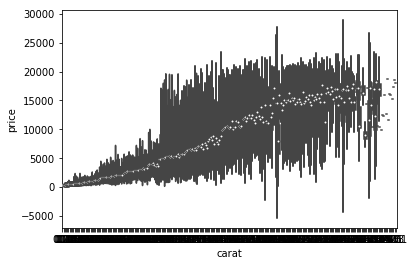

In [29]:
sns.violinplot(x='carat',y='price',data=df)

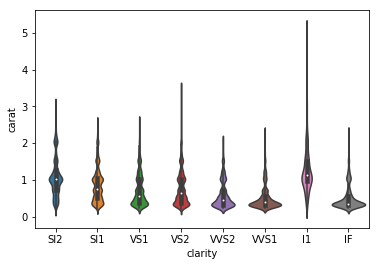

In [32]:
sns.violinplot(x='clarity',y='carat',data=df)

KeyboardInterrupt: 

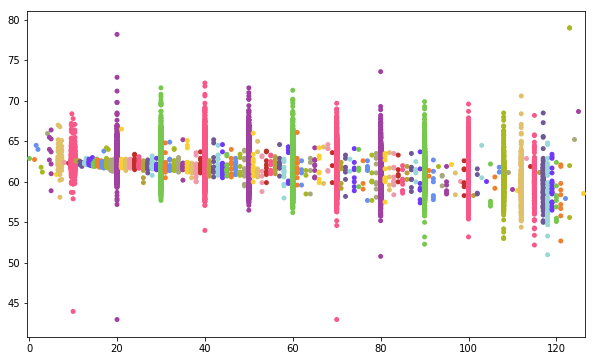

In [39]:
#swarm plot
plt.subplots(figsize=(10,6))
sns.swarmplot(x='table', y='depth', data=df, palette=pkmn_type_colors)

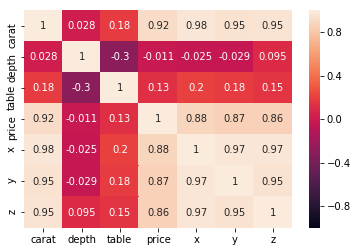

In [40]:
#show correlation of stats via heatmap
corr = df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

KeyboardInterrupt: 

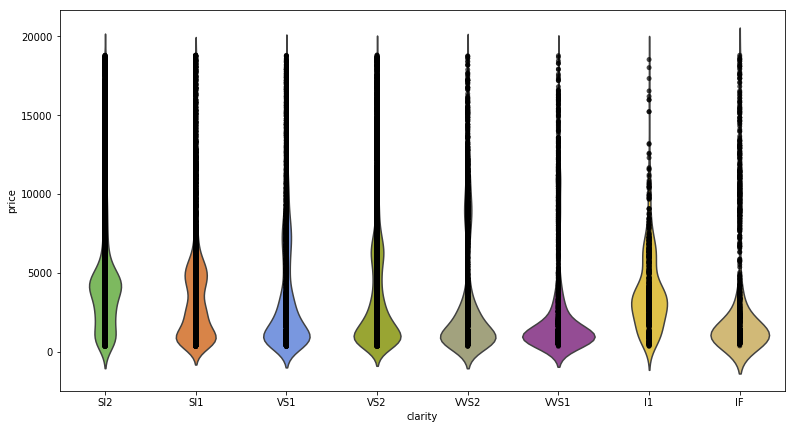

In [78]:
#combine a violin plot with a swarm plot
plt.figure(figsize=(13,7))
sns.violinplot(x='clarity',
               y='price',
               data=df,
               inner=None, #removes bars inside violin plot
               palette=pkmn_type_colors)

sns.swarmplot(x='clarity',
              y='price',
              data=df,
              color='k', #make points black
              alpha=0.7) #slightly transparent

plt.title('Price by Clarity')

### Visualize all Types by Stat

In [79]:
#create a column that contains all stat types and a column for their corresponding value
melt_df = pd.melt(stats_df, 
                  id_vars=['clarity', 'cut', 'color'], #column to keep
                  var_name="Stat")

melt_df.head()

,clarity,cut,color,Stat,value
0,SI2,Ideal,E,carat,0.23
1,SI1,Premium,E,carat,0.21
2,VS1,Good,E,carat,0.23
3,VS2,Premium,I,carat,0.29
4,SI2,Good,J,carat,0.31


In [80]:
#melted datframe has 6 times the amount of rows as original stats dataframe
#6 rows for each pokemon for each stat type
print(stats_df.shape)
print(melt_df.shape)

(53940, 8)
(269700, 5)


KeyboardInterrupt: 

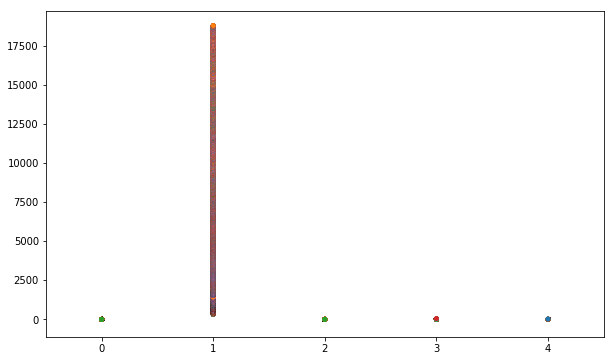

In [82]:
plt.figure(figsize=(10,6))

#swarm plot of Stats from melted dataframe
sns.swarmplot(x='Stat', y='value', 
              data=melt_df,
              hue='color')

This swarm plot is a bit messy, let's clean it up.

KeyboardInterrupt: 

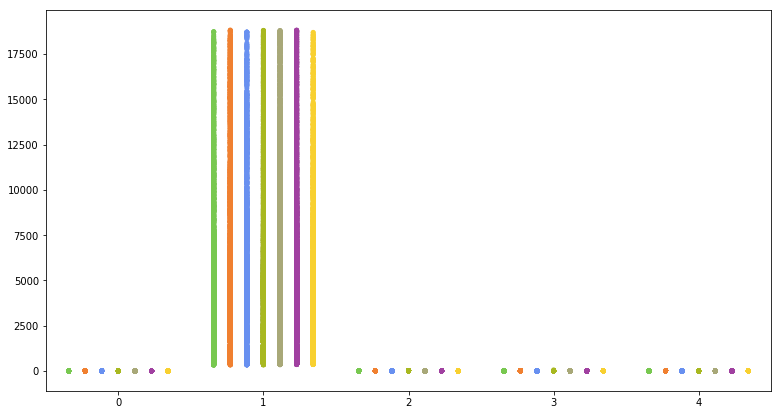

In [83]:
plt.figure(figsize=(13,7))

sns.swarmplot(x='Stat', y='value',
              data=melt_df,
              hue='color', 
              dodge=True, #separate points on chart by hue
              palette=pkmn_type_colors)

#adjust the y-axis
plt.ylim(0,260)

#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

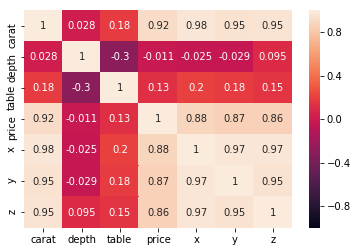

In [37]:
#show correlation of stats via heatmap
corr = stat_df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

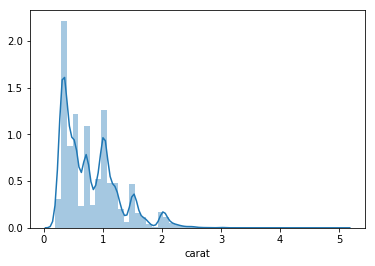

In [86]:
#create a histogram of the distribution of attack power
sns.distplot(df['carat'])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

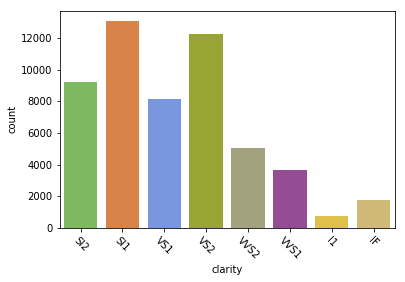

In [87]:
#create a bar plot of Type 1 frequency
sns.countplot(x='clarity',
              data=df, 
              palette=pkmn_type_colors)

plt.xticks(rotation=-45)

KeyboardInterrupt: 

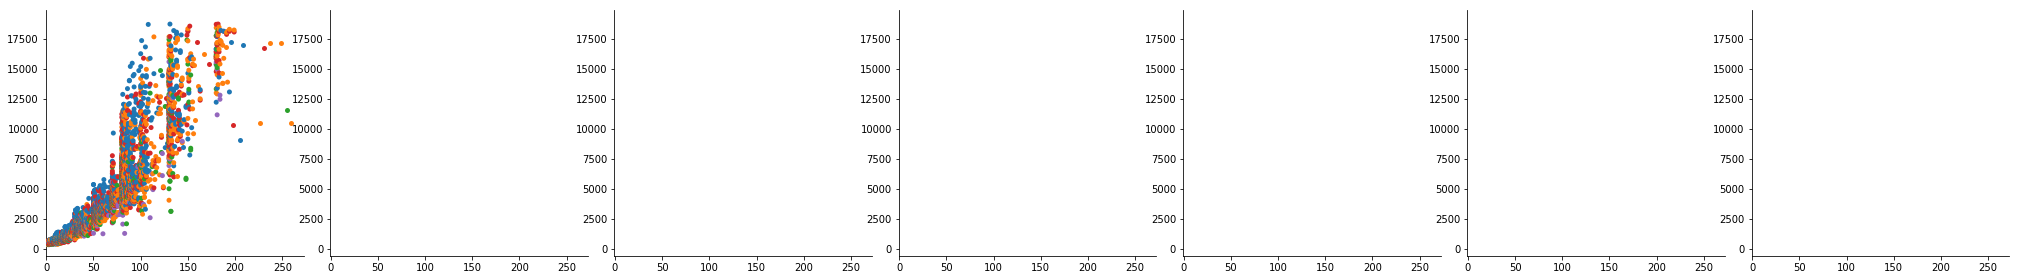

In [90]:
#scatterplot by each stage type (evolution level)
g = sns.factorplot(x='carat', y='price',
                   data=df,
                   hue='cut', 
                   col='color',
                   kind='swarm')

#rotate x-axis labels on ALL charts
g.set_xticklabels(rotation=-45)

Source: https://elitedatascience.com/python-seaborn-tutorial